<a href="https://colab.research.google.com/github/Laudarisd/NN_Backpropogation-algorithm-from-scratch/blob/main/train_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**reference--https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/**

**https://github.com/peterroelants/peterroelants.github.io/blob/main/notebooks/neural_net_implementation/neural-network-implementation-part03.ipynb**


**https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/**


**https://machinelearningmastery.com/implement-machine-learning-algorithm-performance-metrics-scratch-python/**
- To manage memory run this code in terminal - -- jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000
- Import libraries

In [256]:
import tensorflow as tf
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [258]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/Colab_Notebooks/my_research


In [5]:
cd My Drive

/content/drive/My Drive


In [15]:
cd Colab_Notebooks/

/content/drive/My Drive/Colab_Notebooks


In [17]:
cd my_research/

/content/drive/My Drive/Colab_Notebooks/my_research


In [18]:
ls

11.mp4      main_train.ipynb   plot.ipynb   train.csv
LSTM.ipynb  my_research.ipynb  train_1.csv


In [333]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp

In [334]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
def str_column_to_float(datset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
        
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

def dataset_minmax(dataset):
    minmax = list()
    stats = [[min(column), max(column)] for column in zip(*dataset)]
    return stats

def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)-1):
            if(minmax[i][1]-minmax[i][0] !=0):
                row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
            else: row[i] = row[i]=0;

In [335]:
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
accuracy = accuracy_metric(actual, predicted)
#print(accuracy)


# Calculate mean absolute error
def mae_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		sum_error += abs(predicted[i] - actual[i])
	return sum_error / float(len(actual))
 
# Test RMSE
mae = mae_metric(actual, predicted)
#print(mae)

from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
 
# Test RMSE
rmse = rmse_metric(actual, predicted)
#print(rmse)

In [336]:
# def evaluate_algorithm(dataset, algorithm, n_folds, *args):
#     folds = cross_validation_split(dataset, n_folds)
#     scores = list()
#     for fold in folds:
#         train_set = list(folds)
#         train_set.remove(fold)
#         train_set = sum(train_set, [])
#         test_set = list()
#         for row in fold:
#             row_copy = list(row)
#             test_set.append(row_copy)
#             row_copy[-1] = None
#         predicted = algorithm(train_set, test_set, *args)
#         actual = [row[-1] for row in fold]
#         accuracy = accuracy_metric(actual, predicted)
#         scores.append(accuracy)
#     return scores


pred = []
act = []
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
        pred.append(predicted)
        act.append(accuracy)
    return scores

In [337]:
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation


In [338]:
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))


In [339]:
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs


# def forward_propagate(network, row):
#     inputs = row
#     #hidden layer
#     layer = network[0]
#     new_inputs = []
#     for neuron in layer:
#         activation = activate(neuron['weights'], inputs)
#         neuron['output'] = transfer(activation)
#         new_inputs.append(neuron['output'])
#         inputs = new_inputs
#         #output layer
#         layer = network[1]
#         new_inputs = []
#         for neuron in layer:
#             activation = activate(neuron['weights'], inputs)
#             neuron['output'] = softmax(activation)
#             new_inputs.append(neuron['output'])
#         inputs = new_inputs
#     return inputs

In [340]:

def transfer_derivative(output):
    return output * (1.0 - output)
expt = []
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

    expt.append(expected)

In [341]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']


In [342]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    #accuracy = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))


In [343]:
# Initialize a network
# def initialize_network(n_inputs, n_hidden, n_outputs):
#     network = list()
#     hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
#     network.append(hidden_layer)
#     output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
#     network.append(output_layer)
#     return network
def initialize_network(n_inputs, hidden_list, n_outputs):
    network = list()
    hidden_layer = [{'weights': [random() for i in range(n_inputs + 1)]} for i in range(hidden_list[0])]
    network.append(hidden_layer)
    for h in range(len(hidden_list) - 1):
        # print("h:",h)
        hidden_layer = [{'weights': [random() for i in range(hidden_list[h] + 1)]} for i in range(hidden_list[h + 1])]
        network.append(hidden_layer)

    output_layer = [{'weights': [random() for i in range(hidden_list[-1] + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    for layer in network:
        print("\nlayer no:", network.index(layer))
        for neuron in layer:
            print("neuron no:", layer.index(neuron))
            print(neuron)
    return network


In [344]:
# Make a prediction with a network
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [345]:
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
    n_inputs = len(train[0]) - 1
    n_outputs = len(set([row[-1] for row in train]))
    network = initialize_network(n_inputs, n_hidden, n_outputs)
    train_network(network, train, l_rate, n_epoch, n_outputs)
    predictions = list()
    for row in test:
        prediction = predict(network, row)
        predictions.append(prediction)
    return(predictions)

seed(1)

# load and prepare data
#filename = './data/only_position.csv'
filename = './train.csv'
dataset = load_csv(filename)[1:] # prints headers
dataset = load_csv(filename)[1:]

In [346]:
print(dataset)
for i in range(len(dataset[1])-1):
    str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1) # this column contain the grain type
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

check = str_column_to_int(dataset, len(dataset[0])-1)
print("Grain types are:", (check))

[['0.0599113', '0.0584619', '0.0560682', '0.0527481', '0.0485191', '0.0433984', '0.0374029', '0.0305491', '0.0228532', '0.0143313', '0.00499883', '-0.00512877', '-0.0160365', '-0.0277095', '-0.0401335', '-0.0532941', '-0.0671774', '-0.0817698', '-0.0970579', '-0.113028', '-0.129669', '-0.146966', '-0.156874', '-0.150126', '-0.144477', '-0.139907', '-0.136395', '-0.133921', '-0.132465', '-0.132009', '-0.132533', '-0.134019', '-0.136449', '-0.139804', '-0.144068', '-0.149222', '-0.155251', '-0.162137', '-0.169865', '-0.178418', '-0.187782', '-0.197939', '-0.208877', '-0.211567', '-0.210662', '-0.210746', '-0.2118', '-0.213806', '-0.216745', '-0.220601', '-0.225355', '-0.230991', '-0.237492', '-0.244842', '-0.249391', '-0.250944', '-0.25344', '-0.256859', '-0.261186', '-0.266403', '-0.271915', '-0.274553', '0'], ['0.0599113', '0.0584619', '0.0560682', '0.0527481', '0.0485191', '0.0433984', '0.0374029', '0.0305491', '0.0228532', '0.0143313', '0.00499883', '-0.00512877', '-0.0160365', '-0.0

In [347]:
n_folds =2  # devide the data set in 10 sub set that are going to be used as training one by one
l_rate = 0.5 # number of iteration for the training
#n_hidden = 10
hidden_list = [10]
n_epoch = 50

scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, hidden_list)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
#print(accuracy)



layer no: 0
neuron no: 0
{'weights': [0.6749025775182691, 0.8033855134341553, 0.6598238917510797, 0.4262993787138545, 0.7374512500957098, 0.12568332230972723, 0.21213169303189394, 0.04744017352451846, 0.07072687788690923, 0.07644615553590373, 0.9171763132459553, 0.29787980574251793, 0.15820738983282634, 0.5649407226767994, 0.13039112842440792, 0.5607173210286936, 0.850526660963271, 0.5905839712874152, 0.21759033920020698, 0.9008129952123803, 0.460852490153291, 0.8279131566567798, 0.8698864279223623, 0.7800172694327171, 0.6229628138905298, 0.03742337508476401, 0.20040745546617267, 0.0990253627729546, 0.5733827030223086, 0.8965657460164287, 0.5914093121448057, 0.4923507504494802, 0.9379539017823154, 0.3900605387693097, 0.5041073672458524, 0.01720019672323503, 0.6121283611030989, 0.40232471301911965, 0.2813517154611124, 0.15696529448667917, 0.8575367430429213, 0.8111390619505175, 0.5633405356310336, 0.1351431409947249, 0.429240414597316, 0.2665354510728647, 0.09640510259345969, 0.3792337

# evaluate algorithm

In [348]:
print(expected)
print(errors)
n_outputs = len(set([row[-1] for row in dataset]))
print( (row[-1]))

# ex = []
# for row in dataset:
#     #print(row[-1])
#     ex.append(row[-1])
# print(ex)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]
1


In [351]:
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
print("Classification accuracy is:",accuracy)
print("Mean Absolute Error: %.2f%%" % (mae))
print("Root Mean Squared Error: %.2f%%" % rmse)

Mean Accuracy: 50.000%
Classification accuracy is: 70.0
Mean Absolute Error: 0.30%
Root Mean Squared Error: 0.55%


In [352]:
# Example of Calculating and Displaying a Pretty Confusion Matrix
 
# calculate a confusion matrix
def confusion_matrix(actual, predicted):
	unique = set(actual)
	matrix = [list() for x in range(len(unique))]
	for i in range(len(unique)):
		matrix[i] = [0 for x in range(len(unique))]
	lookup = dict()  
	for i, value in enumerate(unique):
		lookup[value] = i
	for i in range(len(actual)):
		x = lookup[actual[i]]
		y = lookup[predicted[i]]
		matrix[y][x] += 1
	return unique, matrix
 
# pretty print a confusion matrix
def print_confusion_matrix(unique, matrix):
	print('(A)' + ' '.join(str(x) for x in unique))
	print('(P)---')
	for i, x in enumerate(unique):
		print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))
 
# Test confusion matrix with integers
unique, matrix = confusion_matrix(actual, predicted)
print_confusion_matrix(unique, matrix)


(A)0 1
(P)---
0| 3 1
1| 2 4


>1.0, 0.0 = 1.000
>1.0, 1.0 = 0.000
>1.0, 1.0 = 0.000
>1.0, 0.0 = 1.000
>1.0, 0.0 = 1.000
>1.0, 1.0 = 0.000
>1.0, 0.0 = 1.000
>1.0, 1.0 = 0.000
>1.0, 1.0 = 0.000
>1.0, 1.0 = 0.000


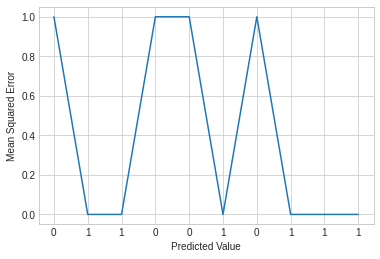

In [353]:
# example of increase in mean squared error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# calculate errors
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
errors = list()
for i in range(len(expected)):
	# calculate error
	err = (expected[i] - predicted[i])**2
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()

>1.0, 0.0 = 1.000
>1.0, 1.0 = 0.000
>1.0, 1.0 = 0.000
>1.0, 0.0 = 1.000
>1.0, 0.0 = 1.000
>1.0, 1.0 = 0.000
>1.0, 0.0 = 1.000
>1.0, 1.0 = 0.000
>1.0, 1.0 = 0.000
>1.0, 1.0 = 0.000


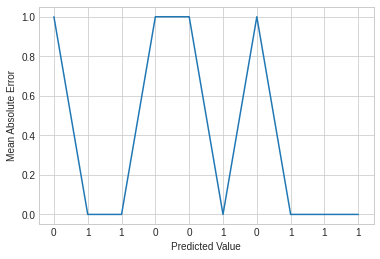

In [354]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
# predicted value
#redicted = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

In [355]:
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, [2], n_outputs)
train_network(network, dataset, 0.09, 20, n_outputs)
#for layer in network:
    #print(layer)

for row in dataset:
    prediction = predict(network, row)
    #print('Expected=%d, Got=%d' % (row[-1], prediction))
    result = ['Expected=%d, Got=%d' % (row[-1], prediction)]
    #result.to_csv(os.path.join(dir,"test_result.csv"), index=False)
    print(result)


layer no: 0
neuron no: 0
{'weights': [0.14614357721812976, 0.5802037503437416, 0.5895847388199476, 0.403976494947083, 0.8667945303666648, 0.4208589927962486, 0.36003226038553626, 0.34141619393132383, 0.2597737506690442, 0.3684847357690475, 0.7109441165884173, 0.7675492661501174, 0.24664830282242822, 0.7904280369394451, 0.7545977381558642, 0.3970488574384696, 0.2838558969927668, 0.7858314113216245, 0.08348050769354542, 0.7086031300603459, 0.9043995286240599, 0.9523973559386671, 0.41379804971287426, 0.12627597363612753, 0.5508352423172159, 0.6411097441822928, 0.2348515258027737, 0.09882583675629941, 0.7217045089633883, 0.04711662037334652, 0.5121483676234108, 0.7873996412270488, 0.8107941595903219, 0.20390818880510597, 0.5436663186186956, 0.550712721910019, 0.3396653899981512, 0.2960462485207944, 0.5161739746723569, 0.035251687781694074, 0.8141311136181832, 0.7990562747975414, 0.03728840521506693, 0.989282796647228, 0.4174959789945154, 0.16381204043977082, 0.5570006969617779, 0.70687852

In [ ]:


#from datetime import datetime
import numpy as np
import pandas as pd
import csv
import os
import datetime
import time

from datetime import datetime
extension = ".csv"
date = datetime.now().strftime("%Y_%m_%d")
filename = date + extension
dir = "../result"
#x = datetime.date.today()
#date = datetime.now().strftime("%Y_%m_%d")
if not os.path.exists(dir):
    os.mkdir(dir)

viscous = 0.02  
radius = 0.01
A_YM = 300 *(10**6)
B_YM = 5 *(10**6)
ratio = round(A_YM/B_YM,3)
percentage = round(((A_YM-B_YM)/A_YM)*100,3)

    
accuracy = sum(scores)/float(len(scores))
result = [radius, date,viscous,  n_folds, n_epoch, l_rate, A_YM, B_YM, ratio,percentage, round(accuracy,3)]
with open(os.path.join(dir,filename),'a',newline ="") as f:
    writer = csv.writer(f)
    writer.writerow(["radius(%)","date", "viscous", "n_folds", "n_epoch", "l_rate","A_YM","B_YM","ratio","percentage","Accuracy%"])
    writer.writerow(result)
    
#open('myfile.%d.dat' % time.time(), 'w+')